# Probabilistic Weighted FTS

Silva, P. C. L; Guimarães, F. G.; Sadaei, H. J. Probabilistic Forecasting With Fuzzy Time Series. Under publishing.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import importlib
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pyFTS.common import Util

#from sklearn.cross_validation import KFold
%pylab inline


In [2]:
from pyFTS.data import TAIEX

taiex = TAIEX.get_data()

train = taiex[:3000]
test = taiex[3000:3200]


In [8]:
from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

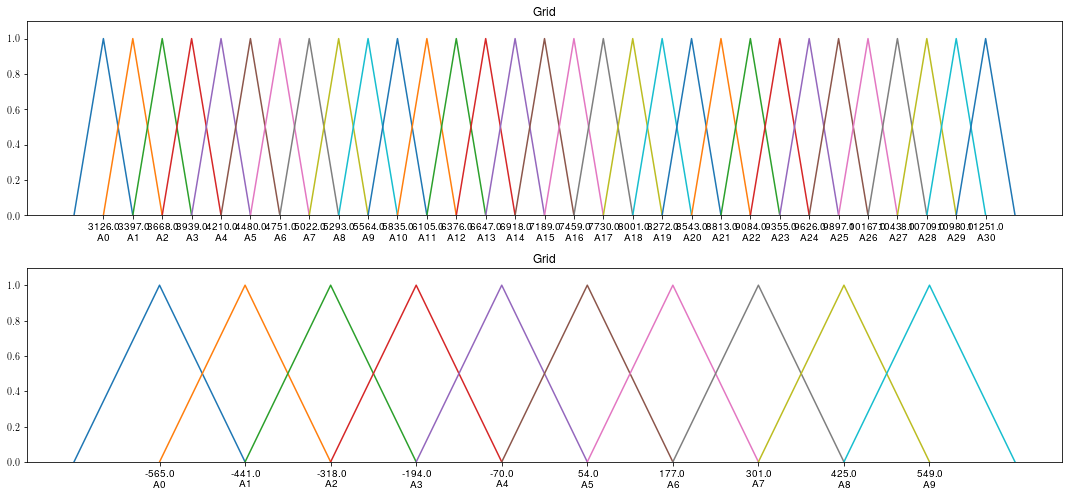

In [9]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.common import FLR,FuzzySet,Membership,SortedCollection 
taiex_fs1 = Grid.GridPartitioner(data=train, npart=30)
taiex_fs2 = Grid.GridPartitioner(data=train, npart=10, transformation=tdiff)

pUtil.plot_partitioners(train, [taiex_fs1,taiex_fs2], tam=[15,7])

In [5]:
from pyFTS.common import fts,tree
from pyFTS.models import hofts, pwfts

pfts1_taiex = pwfts.ProbabilisticWeightedFTS("1", partitioner=taiex_fs1)
pfts1_taiex.fit(train, save_model=True, file_path='pwfts')
pfts1_taiex.shortname = "1st Order"
print(pfts1_taiex)

[ 10:44:33] Start training
[ 10:44:33] Starting batch 1
[ 10:44:34] Finish batch 1
[ 10:44:34] Starting batch 2
[ 10:44:34] Finish batch 2
[ 10:44:34] Starting batch 3
[ 10:44:34] Finish batch 3
[ 10:44:34] Starting batch 4
[ 10:44:34] Finish batch 4
[ 10:44:34] Starting batch 5
[ 10:44:34] Finish batch 5
[ 10:44:34] Starting batch 6
[ 10:44:35] Finish batch 6
[ 10:44:35] Starting batch 7
[ 10:44:35] Finish batch 7
[ 10:44:35] Starting batch 8
[ 10:44:35] Finish batch 8
[ 10:44:35] Starting batch 9
[ 10:44:35] Finish batch 9
[ 10:44:35] Starting batch 10
[ 10:44:35] Finish batch 10
[ 10:44:35] Finish training
Probabilistic FTS:
(0.002) A1 -> (0.42)A1, (0.557)A2, (0.022)A3
(0.108) A10 -> (0.631)A10, (0.204)A11, (0.003)A12, (0.002)A8, (0.159)A9
(0.101) A11 -> (0.219)A10, (0.629)A11, (0.145)A12, (0.002)A13, (0.0)A14, (0.0)A8, (0.004)A9
(0.089) A12 -> (0.002)A10, (0.164)A11, (0.62)A12, (0.21)A13, (0.003)A14
(0.075) A13 -> (0.006)A11, (0.242)A12, (0.621)A13, (0.129)A14, (0.001)A15
(0.048) A

In [11]:
from pyFTS.models import pwfts

pfts1_taiex_diff = pwfts.ProbabilisticWeightedFTS("1", partitioner=taiex_fs2)
pfts1_taiex_diff.append_transformation(tdiff)
pfts1_taiex_diff.fit(train, save_model=True, file_path='pwfts_diff')
pfts1_taiex_diff.shortname = "Diff"
print(pfts1_taiex_diff)

[ 11:33:09] Start training
[ 11:33:09] Starting batch 1
[ 11:33:09] Finish batch 1
[ 11:33:09] Starting batch 2
[ 11:33:09] Finish batch 2
[ 11:33:09] Starting batch 3
[ 11:33:09] Finish batch 3
[ 11:33:09] Starting batch 4
[ 11:33:09] Finish batch 4
[ 11:33:09] Starting batch 5
[ 11:33:09] Finish batch 5
[ 11:33:09] Starting batch 6
[ 11:33:09] Finish batch 6
[ 11:33:09] Starting batch 7
[ 11:33:09] Finish batch 7
[ 11:33:09] Starting batch 8
[ 11:33:10] Finish batch 8
[ 11:33:10] Starting batch 9
[ 11:33:10] Finish batch 9
[ 11:33:10] Starting batch 10
[ 11:33:10] Finish batch 10
[ 11:33:10] Finish training
Probabilistic FTS:
(0.0) A0 -> (0.707)A4, (0.293)A5
(0.001) A1 -> (0.013)A1, (0.169)A2, (0.08)A3, (0.51)A4, (0.228)A5
(0.005) A2 -> (0.005)A1, (0.113)A2, (0.22)A3, (0.377)A4, (0.236)A5, (0.044)A6, (0.005)A7
(0.061) A3 -> (0.002)A1, (0.016)A2, (0.138)A3, (0.472)A4, (0.314)A5, (0.049)A6, (0.005)A7, (0.004)A8, (0.0)A9
(0.399) A4 -> (0.0)A0, (0.001)A1, (0.004)A2, (0.058)A3, (0.446)A4,

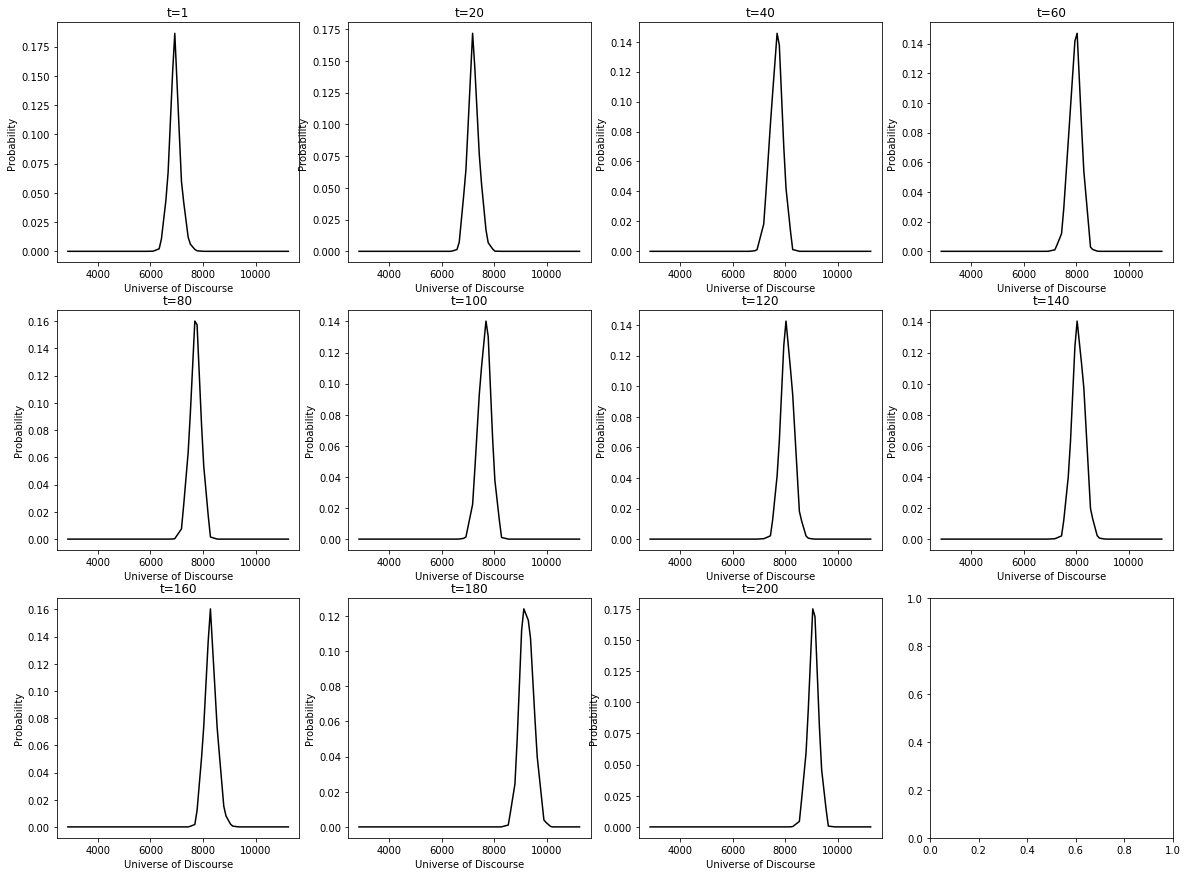

In [3]:
pfts1_taiex = Util.load_obj('pwfts')
tmp = pfts1_taiex.predict(test, type='distribution')
f, ax = plt.subplots(3, 4, figsize=[20,15])
tmp[0].plot(ax[0][0], title='t=1')
tmp[20].plot(ax[0][1], title='t=20')
tmp[40].plot(ax[0][2], title='t=40')
tmp[60].plot(ax[0][3], title='t=60')
tmp[80].plot(ax[1][0], title='t=80')
tmp[100].plot(ax[1][1], title='t=100')
tmp[120].plot(ax[1][2], title='t=120')
tmp[140].plot(ax[1][3], title='t=140')
tmp[160].plot(ax[2][0], title='t=160')
tmp[180].plot(ax[2][1], title='t=180')
tmp[199].plot(ax[2][2], title='t=200')

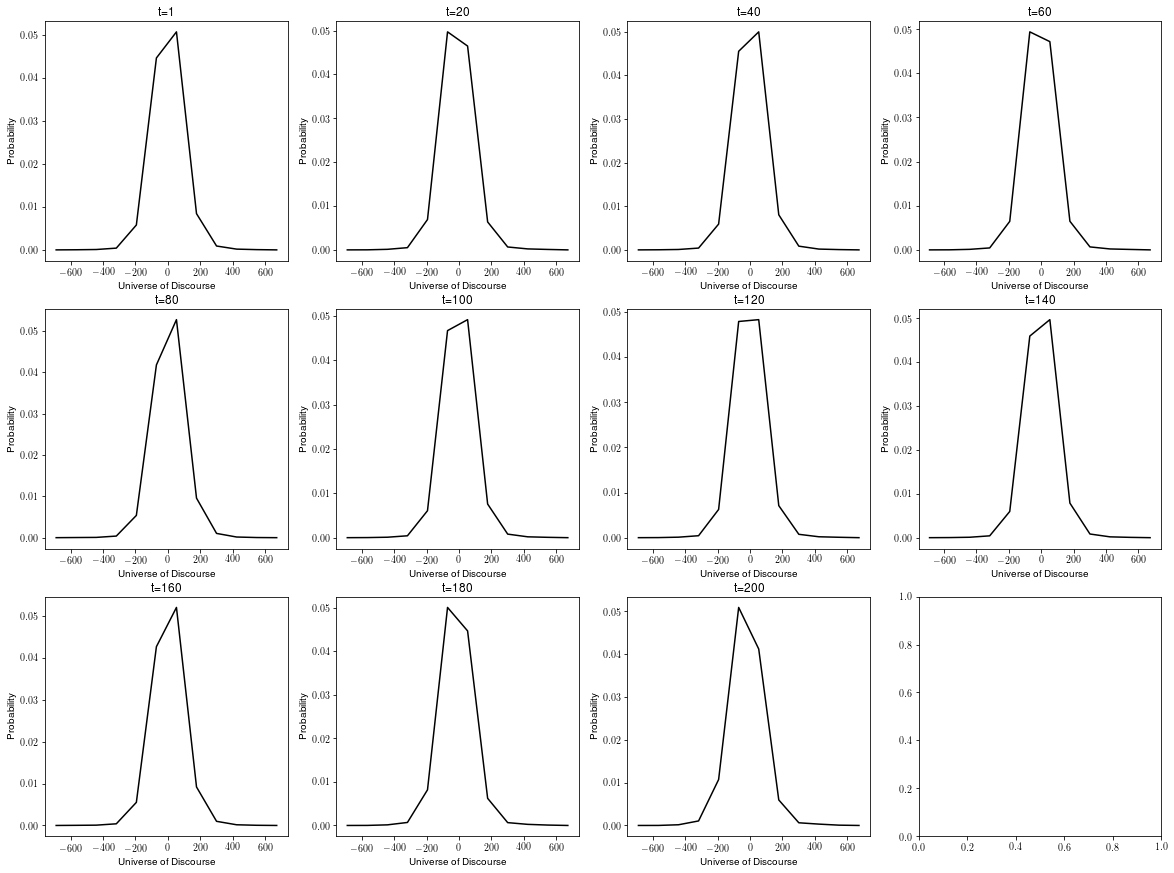

In [12]:
#pfts1_taiex_diff = Util.load_obj('pwfts_diff')
tmp = pfts1_taiex_diff.predict(test, type='distribution')
f, ax = plt.subplots(3, 4, figsize=[20,15])
tmp[0].plot(ax[0][0], title='t=1')
tmp[20].plot(ax[0][1], title='t=20')
tmp[40].plot(ax[0][2], title='t=40')
tmp[60].plot(ax[0][3], title='t=60')
tmp[80].plot(ax[1][0], title='t=80')
tmp[100].plot(ax[1][1], title='t=100')
tmp[120].plot(ax[1][2], title='t=120')
tmp[140].plot(ax[1][3], title='t=140')
tmp[160].plot(ax[2][0], title='t=160')
tmp[180].plot(ax[2][1], title='t=180')
tmp[199].plot(ax[2][2], title='t=200')

[6418.54880273569, 10388.617021717171]

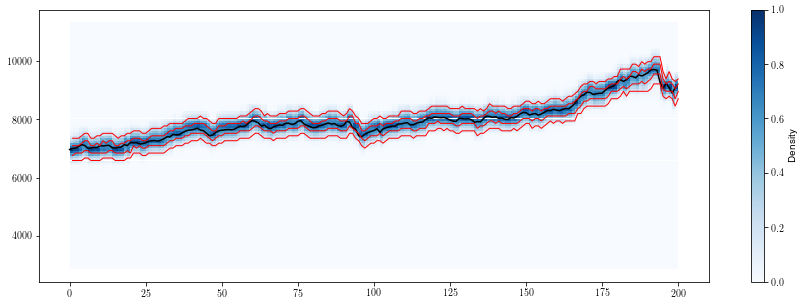

In [4]:
from pyFTS.benchmarks import benchmarks as bchmk

tmp1 = []
tmp2 = []
for dist in tmp:
    tmp1.append( dist.quantile([.05, .95]))
    tmp2.append( dist.quantile([.25, .75]))

f, ax = plt.subplots(1, 1, figsize=[15,5])

ax.plot(np.arange(0,200), test,color="black")

bchmk.plot_probabilitydistribution_density(ax, "Blues", tmp, f, 0)

bchmk.plot_interval(ax, tmp1, 1, label=None)
bchmk.plot_interval(ax, tmp2, 1, label=None)

In [ ]:
from pyFTS.benchmarks import benchmarks as bchmk
f, ax = plt.subplots(1, 1, figsize=[15,5])

ax.plot(np.arange(0,200), taiex[3000:3200],color="black")


#tmp1

In [ ]:
from pyFTS.benchmarks import benchmarks as bchmk

def plot_sidebyside(model, data, **kwargs):

    tmp = model.forecastAheadDistribution(data, 20, **kwargs)

    f, ax = plt.subplots(2, 5, figsize=[20,15])
    tmp[0].plot(ax[0][0], title='t+1')
    tmp[2].plot(ax[0][1], title='t+2')
    tmp[4].plot(ax[0][2], title='t+4')
    tmp[6].plot(ax[0][3], title='t+6')
    tmp[8].plot(ax[0][4], title='t+8')
    tmp[10].plot(ax[1][0], title='t+10')
    tmp[12].plot(ax[1][1], title='t+12')
    tmp[14].plot(ax[1][2], title='t+14')
    tmp[16].plot(ax[1][3], title='t+16')
    tmp[18].plot(ax[1][4], title='t+18')

In [ ]:
plot_sidebyside(pfts1_taiex, taiex[3000:3200], method=1, h=0.15)

In [ ]:
plot_sidebyside(pfts1_taiex, taiex[3000:3200], method=2, h=0.15)

In [ ]:
plot_sidebyside(pfts1_taiex, taiex[3000:3200], method=3, h=0.15)

In [ ]:
plot_sidebyside(pfts1_taiex, taiex[3000:3200], method=4)

In [ ]:
from pyFTS.benchmarks import Measures
from pyFTS.probabilistic import kde, ProbabilityDistribution

importlib.reload(Measures)
importlib.reload(kde)
importlib.reload(ProbabilityDistribution)

def evaluate_individual_model(model, test_data, evaluation_data, method, h, kernel):
    import numpy as np
    from pyFTS import ensemble
    from pyFTS.models import msfts
    from pyFTS.models.seasonal import SeasonalIndexer
    from pyFTS.probabilistic import ProbabilityDistribution
    from pyFTS.benchmarks import Measures
    
    forecasts = model.forecastAheadDistribution(test_data, 10, method=method, h=h, kernel=kernel)
    crps = Measures.crps(test_data, forecasts)
    
    return {'method': method, 'kernel':kernel, 'h': h, 'crps': crps}


evaluate_individual_model(pfts1_taiex, taiex[3000:3010], taiex[3010:3030], 4, 0.15, 'gaussian')

In [ ]:
import dispy
import dispy.httpd

kernels = ["gaussian","epanechnikov","triangular","logistic","cosine","sigmoid"]
processadores = ['192.168.0.100', '192.168.0.110']

cluster = dispy.JobCluster(evaluate_individual_model, nodes=processadores)  # , depends=dependencies)
http_server = dispy.httpd.DispyHTTPServer(cluster)

jobs = []
for m in [1,2,3,4]:
    for k in kernels:
        ini = 3100
        for dt in np.arange(0,5):
            test = taiex[ini : ini+3]
            evalu = taiex[ini+3 : ini+13]
            for h in np.arange(0.1,1,0.05):
                job = cluster.submit(pfts1_taiex, test, evalu, m, h, k)
                job.id = dt + h*100

                jobs.append(job)
                
            ini += 10

results = {}
  
for job in jobs:
    tmp = job()
    if job.status == dispy.DispyJob.Finished and tmp is not None:
        if tmp['method'] not in results:
            results[tmp['method']] = {}
            
        if tmp['kernel'] not in results[tmp['method']]:
            results[tmp['method']][tmp['kernel']] = {}
            
        if tmp['h'] not in results[tmp['method']][tmp['kernel']]:
            results[tmp['method']][tmp['kernel']][tmp['h']] = []
            
        results[tmp['method']][tmp['kernel']][tmp['h']].append(tmp['crps'])

cluster.wait()  # wait for all jobs to finish

cluster.print_status()

http_server.shutdown()  # this waits until browser gets all updates
cluster.close()

dados = []
ncolunas = None

for m in sorted(results.keys()):
    for k in sorted(results[m].keys()):
        for h in sorted(results[m][k].keys()):
            tmp = []
            tmp.append(m)
            tmp.append(k)
            tmp.append(h)
            tmp.extend(results[m][k][h])

            dados.append(tmp)

            if ncolunas is None:
                ncolunas = len(results[m][k][h])

colunas = ["method","kernel","h"]
for k in np.arange(0,ncolunas):
    colunas.append(str(k))

dat = pd.DataFrame(dados, columns=colunas)
dat.to_csv("experiments/taiex_pwfts_kernels.csv", sep=";")

In [ ]:
colunas = []
for k in np.arange(0,ncolunas):
    colunas.append(str(k))
    
tcolunas = ['method', 'kernel','h']
tcolunas.extend(colunas)
    
dat = pd.read_csv("experiments/taiex_pwfts_kernels.csv", usecols=tcolunas,  sep=";")
dat
colunas = []
for k in np.arange(0,ncolunas):
    colunas.append(str(k))
    
m = len(dat.method.unique())
l = len(dat.kernel.unique())

fig, axes = plt.subplots(nrows=m, ncols=l, figsize=[15,30])

for ct, m in enumerate(sorted(dat.method.unique())):
    for count, k in enumerate(sorted(dat.kernel.unique())):
        dados = []
        labels = []

        for h in [tmp for tmp in sorted(dat.h.unique()) if tmp <= .3]:
            df = dat[(dat.method == m) & (dat.kernel == k) & (dat.h == h)][colunas]
            tmp = df.to_dict(orient="records")[0]
            ret = [k for k in tmp.values() if not np.isnan(k)]
            dados.append(ret)
            labels.append(h)


        axes[ct][count].set_title(k)
        axes[ct][count].set_xlabel('CRPS')
        axes[ct][count].set_ylabel('h')
        axes[ct][count].boxplot(dados, labels=labels, vert=False, autorange=True, showmeans=True)
    
plt.tight_layout()

In [ ]:
http_server.shutdown()  # this waits until browser gets all updates
cluster.close()

In [ ]:
from pyFTS.benchmarks import benchmarks as bchmk

f, ax = plt.subplots(1, 1, figsize=[15,5])

ax.plot(np.arange(0,200), taiex[3000:3200],color="black")

bchmk.plot_probabilitydistribution_density(ax, "Blues", tmp, f, 0)